## Tugas 
#### 1.Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv. 

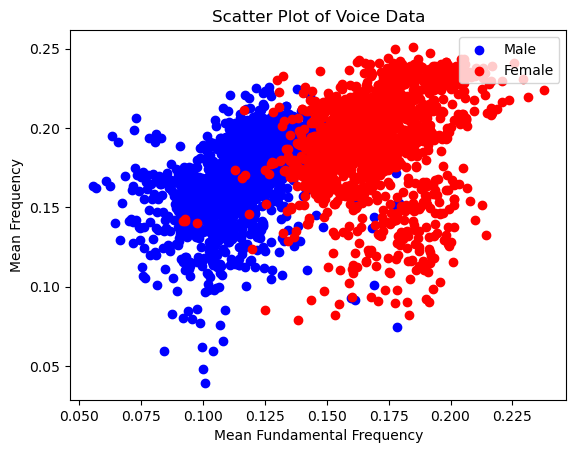

Akurasi: 97.63%
Laporan Klasifikasi:
               precision    recall  f1-score   support

      female       0.96      0.99      0.98       297
        male       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# 1. Memuat Data
data = pd.read_csv('voice.csv')
X = data.drop('label', axis=1)
y = data['label']

# Memplot data X dan y
plt.scatter(X[y == 'male']['meanfun'], X[y == 'male']['meanfreq'], label='Male', c='blue')
plt.scatter(X[y == 'female']['meanfun'], X[y == 'female']['meanfreq'], label='Female', c='red')
plt.xlabel('Mean Fundamental Frequency')
plt.ylabel('Mean Frequency')
plt.legend(loc='upper right')
plt.title('Scatter Plot of Voice Data')
plt.show()

# 2. Membagi Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Preprocessing Data (opsional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Membuat Model SVM
svm_model = SVC(kernel='linear', C=1.0)  # Anda dapat menyesuaikan kernel dan C sesuai kebutuhan

# 5. Pelatihan Model
svm_model.fit(X_train, y_train)

# 6. Evaluasi Model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Laporan Klasifikasi:\n", report)


#### 2.Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

  A.Menggunakan data spam.csv

  B.Fitur CountVectorizer dengan mengaktifkan stop_words
  
  C.Evaluasi hasilnya

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Memuat Data
df = pd.read_csv('spam.csv', usecols=['v1', 'v2'], encoding='latin-1')
df = df.drop(df.iloc[:,2:], axis=1)
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

df = df.rename(columns=new_cols)
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())



ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


In [12]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,NaN,"Go until jurong point, crazy.. Available only ..."
1,NaN,Ok lar... Joking wif u oni...
2,NaN,Free entry in 2 a wkly comp to win FA Cup fina...
3,NaN,U dun say so early hor... U c already then say...
4,NaN,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
X = df['SMS'].values
y = df['Labels'].values

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing menjadi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer(stop_words='english')

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
X_test = bow.transform(X_test)

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data test
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train * 100:2f}%')
print(f'Hasil akurasi data test: {acc_test * 100:2f}%')

Hasil akurasi data train: 99.358974%
Hasil akurasi data test: 98.325359%


#### 3.Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,<br> 
a.Menggunakan data spam.csv<br>
b.Fitur TF-IDF dengan mengaktifkan stop_words<br>
c.Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.<br>
d.Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv<br>

In [19]:
X = df['SMS'].values
y = df['Labels'].values

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data training dan testing menjadi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Inisiasi CountVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fitting dan transform X_train dengan TF-IDF
X_train = tfidf.fit_transform(X_train)

# Transform X_test
X_test = tfidf.transform(X_test)

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data test
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train * 100:f}%')
print(f'Hasil akurasi data test: {acc_test * 100:f}%')

Hasil akurasi data train: 98.410256%
Hasil akurasi data test: 96.351675%
